[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hesther/teaching/blob/main/med_inf/Lecture_demonstration.ipynb)

# LV 12 of Methods for Data Generation and Analytics in Medicine and Life Sciences

In [2]:
!pip install -q rdkit numpy scikit-learn chemprop torch==2.4.1
!pip install -q torch_scatter torch_sparse -f https://data.pyg.org/whl/torch-2.4.1+cpu.html
!pip install -q torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.0/797.0 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Machine Learning in Chemistry

### 1. Solubility data
One great Python package for molecules is RDKit. We can input a molecule from an SMILES string, which is a in-line notation for molecules that is also readable by humans. For example:

- Methane: C
- Ethane: CC
- Ethene: C=C
- Propane: CCC
- Butane: CCCC
- Isobutane: CC(C)C
- Cyclobutane: C1CCC1

You get the picture.

In [3]:
import rdkit
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("https://github.com/hesther/rxn_workshop/raw/main/data/esol/train_full.csv")
data

,smiles,logSolubility
0,CC/C=C\C,-2.540
1,O=C1NC(=O)NC(=O)C1(CC)CC=C(C)C,-2.253
2,Cc1[nH]c(=O)n(c(=O)c1Cl)C(C)(C)C,-2.484
3,CC/C=C/C,-2.540
4,ClC(Cl)C(c1ccc(Cl)cc1)c2ccc(Cl)cc2,-7.200
...,...,...
897,O2c1ccc(N)cc1N(C)C(=O)c3cc(C)ccc23,-3.928
898,CCCCCCCC#C,-4.240
899,CCCC(=O)OCC,-1.360
900,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,-4.880


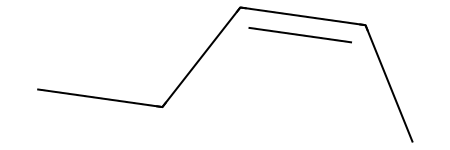

In [5]:
mol1 = rdkit.Chem.MolFromSmiles(data['smiles'][0])
mol1

To fit a neural network, we have to transform the SMILES strings into a list of features. Luckily, RDKit has a functionality to do that:

In [6]:
Descriptors.CalcMolDescriptors(mol1)

{'MaxAbsEStateIndex': np.float64(2.125),
 'MaxEStateIndex': np.float64(2.125),
 'MinAbsEStateIndex': np.float64(1.1631944444444444),
 'MinEStateIndex': np.float64(1.1631944444444444),
 'qed': 0.41363968044003097,
 'SPS': 10.0,
 'MolWt': 70.135,
 'HeavyAtomMolWt': 60.05499999999999,
 'ExactMolWt': 70.07825032,
 'NumValenceElectrons': 30,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': -0.03794287307367419,
 'MinPartialCharge': -0.0916744470464646,
 'MaxAbsPartialCharge': 0.0916744470464646,
 'MinAbsPartialCharge': 0.03794287307367419,
 'FpDensityMorgan1': 1.6,
 'FpDensityMorgan2': 2.2,
 'FpDensityMorgan3': 2.2,
 'BCUT2D_MWHI': 13.594079354378078,
 'BCUT2D_MWLOW': 10.430607628427651,
 'BCUT2D_CHGHI': 1.5174139912845042,
 'BCUT2D_CHGLO': -1.6468102360406212,
 'BCUT2D_LOGPHI': 1.7323374263754383,
 'BCUT2D_LOGPLOW': -1.4311843309765475,
 'BCUT2D_MRHI': 4.730012035564743,
 'BCUT2D_MRLOW': 1.2174768301743983,
 'AvgIpc': 1.4056390622295665,
 'BalabanJ': np.float64(2.622415807990217),
 'BertzCT

In [7]:
def features(smi):
    mol = rdkit.Chem.MolFromSmiles(smi)
    return np.array(list(Descriptors.CalcMolDescriptors(mol).values()))

features("CCC")

array([ 2.125     ,  2.125     ,  1.25      ,  1.25      ,  0.38547066,
        6.        , 44.097     , 36.033     , 44.06260026, 20.        ,
        0.        , -0.05903836, -0.06564544,  0.06564544,  0.05903836,
        1.33333333,  1.33333333,  1.33333333, 13.42571365, 10.59728635,
        1.35237444, -1.47605824,  1.55881365, -1.26961365,  3.91771365,
        1.08928635,  0.91829583,  1.63299316,  0.        ,  2.70710678,
        2.70710678,  2.70710678,  1.41421356,  1.41421356,  1.41421356,
        0.70710678,  0.70710678,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  2.7548875 ,  3.        ,  2.        ,
        0.        , 21.46913526,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , 20.26829602,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 20.26829602,  0.        ,  0.        ,  0.  

Ok, let's now make one giant 2D array of x values, and try to predict y (the solubility):

In [8]:
x_raw = np.array([features(smi) for smi in data['smiles']])
standardize_by = np.max(np.abs(x_raw),axis=0)+0.1
x_train = x_raw / standardize_by
y_train = np.array(data['logSolubility'])

Let's also load a test set:

In [9]:
data = pd.read_csv("https://github.com/hesther/rxn_workshop/raw/main/data/esol/test_full.csv")
x_raw = np.array([features(smi) for smi in data['smiles']])
x_test = x_raw / standardize_by
y_test = np.array(data['logSolubility'])

### 2. Linear regression
Let's try a simple regression first:

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import matplotlib.pyplot as plt

MAE: 0.547741651633407


Text(0, 0.5, 'predicted solubility')

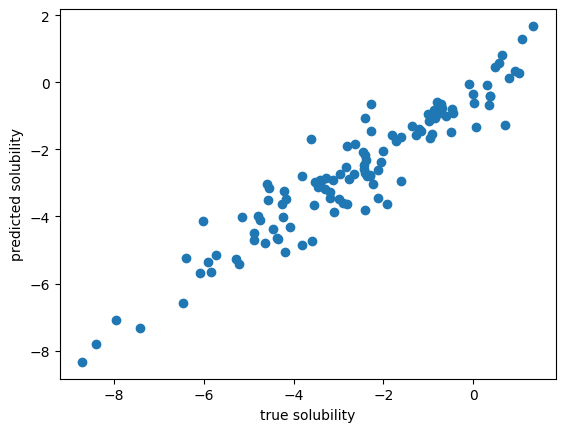

In [11]:
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("true solubility")
plt.ylabel("predicted solubility")

As a test, let's try to use our model on some unseen, possibly out-of-distribution data: Vitamin D and Vitamin C:

In [12]:
x2 = np.array([features(smi) for smi in ['CC1=C(C(CCC1)(C)C)/C=C/C(=C/C=C/C(=C/CO)/C)/C',
                                        'C(C(C1C(=C(C(=O)O1)O)O)O)O']])
x2 = x2 / standardize_by
model.predict(x2)

array([-4.83447755, -0.48096322])

### 3. Neural network
Let's use a neural network instead of a simple linear regression:

MAE: 0.45530060974329745


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'predicted solubility')

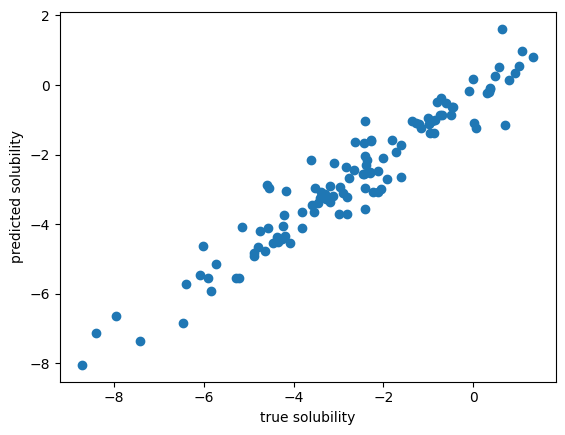

In [13]:
model = MLPRegressor()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("true solubility")
plt.ylabel("predicted solubility")

In [14]:
model.predict(x2)

array([-5.68479724,  0.06257979])

### 4. Custom models, e.g. neural network

In [15]:
from rdkit import Chem
import math

import torch
from torch import nn
import torch.nn.functional as F

import torch_geometric as tg
from torch_geometric.data import Dataset
from torch_geometric.loader import DataLoader
from torch_geometric.nn import MessagePassing
from torch_geometric.nn import global_add_pool

Let's first make a custom NN, similar to the MLPRegressor from scikit-learn:

In [18]:
class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        super(FeatureDataset, self).__init__()
        self.features = features
        self.labels = labels

    def process_key(self, key):
        data = tg.data.Data()
        data.f = torch.tensor([self.features[key]], dtype=torch.float)
        data.y = torch.tensor([self.labels[key]], dtype=torch.float)
        return data

    def get(self,key):
        return self.process_key(key)

    def len(self):
        return len(self.labels)

def construct_loader(data_path, shuffle=True, batch_size=50, std=None):
    data_df = pd.read_csv(data_path)
    x_raw = np.array([features(smi) for smi in data_df['smiles']])
    try:
      f = x_raw / std
    except:
      std = np.max(np.abs(x_raw),axis=0)+0.1
      f = x_raw / std

    labels = data_df.iloc[:, 1].values.astype(np.float32)
    dataset = FeatureDataset(f, labels)
    loader = DataLoader(dataset=dataset,
                            batch_size=batch_size,
                            shuffle=shuffle,
                            num_workers=0,
                            pin_memory=True,
                            sampler=None)
    return loader, std

class NN(nn.Module):
    def __init__(self, num_features):
        super(NN, self).__init__()

        self.hidden_size = 300
        self.n1 = nn.Linear(num_features, self.hidden_size)
        self.n2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.n3 = nn.Linear(self.hidden_size, 1)

    def forward(self, data):
        x = data.f
        x = self.n1(x)
        x = self.n2(x)
        x = self.n3(x)
        return x.squeeze(-1)

def train_epoch(model, loader, optimizer, loss):
    model.train()
    loss_all = 0

    for data in loader:
        optimizer.zero_grad()

        out = model(data)
        result = loss(out, data.y)
        result.backward()

        optimizer.step()
        loss_all += loss(out, data.y)

    return math.sqrt(loss_all / len(loader.dataset))

def pred(model, loader, loss):
    model.eval()

    preds, ys = [], []
    with torch.no_grad():
        for data in loader:
            pred = model(data)
            preds.extend(pred.cpu().detach().tolist())

    return preds

def train(folder):
    torch.manual_seed(0)
    train_loader, std = construct_loader(folder+"/train_full.csv", True, batch_size=10000)
    val_loader, _ = construct_loader(folder+"/val_full.csv", False, std=std)
    test_loader, _ = construct_loader(folder+"/test_full.csv", False, std=std)


    model = NN(217)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss = nn.MSELoss(reduction='sum')
    print(model)

    for epoch in range(0, 200):
        train_loss = train_epoch(model, train_loader, optimizer, loss)
        preds = pred(model, val_loader, loss)
        print("Epoch",epoch,"  Train RMSE", train_loss,"   Val RMSE", root_mean_squared_error(preds,val_loader.dataset.labels))

    preds = pred(model, test_loader, loss)
    print("Test RMSE", root_mean_squared_error(preds,test_loader.dataset.labels))
    print("Test MAE", mean_absolute_error(preds,test_loader.dataset.labels))



In [19]:
train("https://github.com/hesther/rxn_workshop/raw/main/data/esol")

NN(
  (n1): Linear(in_features=217, out_features=300, bias=True)
  (n2): Linear(in_features=300, out_features=300, bias=True)
  (n3): Linear(in_features=300, out_features=1, bias=True)
)
Epoch 0   Train RMSE 3.802357298852543    Val RMSE 3.2494654655456543
Epoch 1   Train RMSE 3.471708668347743    Val RMSE 2.931489944458008
Epoch 2   Train RMSE 3.1403468374173804    Val RMSE 2.5941290855407715
Epoch 3   Train RMSE 2.785004899244947    Val RMSE 2.246241807937622
Epoch 4   Train RMSE 2.4098342358892886    Val RMSE 1.9533767700195312
Epoch 5   Train RMSE 2.0728355149018407    Val RMSE 1.856888771057129
Epoch 6   Train RMSE 1.9135465588314156    Val RMSE 2.0273890495300293
Epoch 7   Train RMSE 2.031203518849195    Val RMSE 2.2340691089630127
Epoch 8   Train RMSE 2.217385208100364    Val RMSE 2.2612013816833496
Epoch 9   Train RMSE 2.242288726754621    Val RMSE 2.120316743850708
Epoch 10   Train RMSE 2.108345062866553    Val RMSE 1.9029979705810547
Epoch 11   Train RMSE 1.907616360116316   

### 5. Custom models, e.g. attention layer

We can build any architecture or logic we like. For example, instead of the NN, we could make an attention layer (of course, one simple attention layer is not enough for a good model, but it is fun to build it):

In [20]:
class Att(nn.Module):
    def __init__(self, k, v):
        super(Att, self).__init__()

        self.hidden_size = 300
        self.feature_size = k.shape[1]
        self.nq = nn.Linear(k.shape[1], self.hidden_size)
        self.nk = nn.Linear(k.shape[1], self.hidden_size)
        self.nv = nn.Linear(k.shape[0], k.shape[0])
        self.k = k
        self.v = v

    def forward(self, data):
        keys = self.nk(self.k)
        queries = self.nq(data.f)
        values = self.nv(self.v)

        # Scaled dot-product attention
        scores = torch.matmul(queries, keys.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.feature_size, dtype=torch.float32))
        # Apply softmax
        attention_weights = F.softmax(scores, dim=-1)
        # Multiply weights with values
        x = torch.matmul(attention_weights, values)

        return x.squeeze(-1)


def train(folder):
    torch.manual_seed(0)
    train_loader, std = construct_loader(folder+"/train_full.csv", False)
    val_loader, _ = construct_loader(folder+"/val_full.csv", False, std=std)
    test_loader, _ = construct_loader(folder+"/test_full.csv", False, std=std)

    model = Att(torch.tensor(train_loader.dataset.features, dtype=torch.float), torch.tensor(train_loader.dataset.labels, dtype=torch.float))
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss = nn.MSELoss(reduction='sum')
    print(model)

    for epoch in range(0, 200):
        train_loss = train_epoch(model, val_loader, optimizer, loss)
        preds = pred(model, test_loader, loss)
        print("Epoch",epoch,"  Train RMSE", train_loss,"   Val RMSE", root_mean_squared_error(preds,test_loader.dataset.labels))

    preds = pred(model, test_loader, loss)
    print("Test RMSE", root_mean_squared_error(preds,test_loader.dataset.labels))
    print("Test MAE", mean_absolute_error(preds,test_loader.dataset.labels))



In [21]:
train("https://github.com/hesther/rxn_workshop/raw/main/data/esol")

Att(
  (nq): Linear(in_features=217, out_features=300, bias=True)
  (nk): Linear(in_features=217, out_features=300, bias=True)
  (nv): Linear(in_features=902, out_features=902, bias=True)
)
Epoch 0   Train RMSE 2.761583381583381    Val RMSE 4.025290012359619
Epoch 1   Train RMSE 3.3364270317871396    Val RMSE 2.2252161502838135
Epoch 2   Train RMSE 2.097691256836618    Val RMSE 2.759619951248169
Epoch 3   Train RMSE 2.6950903759525398    Val RMSE 2.218815565109253
Epoch 4   Train RMSE 1.9861767016282672    Val RMSE 2.5919389724731445
Epoch 5   Train RMSE 2.2916890461146844    Val RMSE 2.547104597091675
Epoch 6   Train RMSE 2.1024774878132404    Val RMSE 2.1643099784851074
Epoch 7   Train RMSE 2.0220256578306057    Val RMSE 2.2533295154571533
Epoch 8   Train RMSE 2.080011873578147    Val RMSE 2.1647093296051025
Epoch 9   Train RMSE 1.9167401327344655    Val RMSE 2.3500921726226807
Epoch 10   Train RMSE 2.003285451286141    Val RMSE 2.197751045227051
Epoch 11   Train RMSE 1.8699937744852

### 6. Custom models, e.g. message passing neural network

We now need to transform our RDKit molecule objects to graphs with edge (bond) and node (atom) features. Here, we use a simply one-hot encoding of symbol, degree, hydrogen atoms, hybridization, and aromaticity (vector size = 29). For bond features, we simply use the bond type, and whether it is conjugated and in a ring (vector size = 6). In general, this initial featurization should be adapted for more complex problems.

In [22]:
def atom_features(atom):
    features = onek_encoding_unk(atom.GetSymbol(), ['C', 'N', 'O',  'P', 'S', 'Cl', 'Br', 'I']) + \
        onek_encoding_unk(atom.GetTotalDegree(), [0, 1, 2, 3, 4, 5]) + \
        onek_encoding_unk(int(atom.GetTotalNumHs()), [0, 1, 2, 3, 4]) + \
        onek_encoding_unk(int(atom.GetHybridization()),[Chem.rdchem.HybridizationType.SP,
                                                        Chem.rdchem.HybridizationType.SP2,
                                                        Chem.rdchem.HybridizationType.SP3,
                                                        Chem.rdchem.HybridizationType.SP3D,
                                                        Chem.rdchem.HybridizationType.SP3D2
                                                        ]) + \
        [1 if atom.GetIsAromatic() else 0]
    return features

def bond_features(bond):
    bt = bond.GetBondType()
    fbond = [
            bt == Chem.rdchem.BondType.SINGLE,
            bt == Chem.rdchem.BondType.DOUBLE,
            bt == Chem.rdchem.BondType.TRIPLE,
            bt == Chem.rdchem.BondType.AROMATIC,
            (bond.GetIsConjugated() if bt is not None else 0),
            (bond.IsInRing() if bt is not None else 0)
      ]
    return fbond

def onek_encoding_unk(value, choices):
    encoding = [0] * (len(choices) + 1)
    index = choices.index(value) if value in choices else -1
    encoding[index] = 1
    return encoding

In [23]:
class MolGraph:
    def __init__(self, smiles):
        self.smiles = smiles
        self.f_atoms = []
        self.f_bonds = []
        self.edge_index = []

        mol = Chem.MolFromSmiles(self.smiles)
        n_atoms=mol.GetNumAtoms()

        for a1 in range(n_atoms):
            f_atom = atom_features(mol.GetAtomWithIdx(a1))
            self.f_atoms.append(f_atom)

            for a2 in range(a1 + 1, n_atoms):
                bond = mol.GetBondBetweenAtoms(a1, a2)
                if bond is None:
                    continue
                f_bond = bond_features(bond)
                self.f_bonds.append(f_bond)
                self.f_bonds.append(f_bond)
                self.edge_index.extend([(a1, a2), (a2, a1)])

In [24]:
g = MolGraph("CCO")
for i,f in enumerate(g.f_atoms):
  print(i,f)
for (i,j),f in zip(g.edge_index,g.f_bonds):
  print(i,j,f)

0 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
1 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
2 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
0 1 [True, False, False, False, False, False]
1 0 [True, False, False, False, False, False]
1 2 [True, False, False, False, False, False]
2 1 [True, False, False, False, False, False]


For a dataset of molecules and their properties, we can now build a dataset object, and a loader which inherit from pytorch_geometric's Dataset and DataLoader. The ChemDataset class takes as input a list of SMILES and target values. Whenever we retrieve an element from this list via the get() function, we create a MolGraph from the respective SMILES strings. For this course, we do not implement any caching, but remake the graphs whenever we need them (we also don't hold them in memory). The molgraph2data function transforms our custom MolGraph into a format more convenient for pytorch_geometric's functionalities (and, importantly, into torch tensors). The construct_loader() functions takes a CSV file saved locally or from the internet, and uses the first column as list of SMILES, and the second as list of targets, for the sake of simplicity (for a real software package, don't hardcode this!)

In [25]:
class ChemDataset(Dataset):
    def __init__(self, smiles, labels):
        super(ChemDataset, self).__init__()
        self.smiles = smiles
        self.labels = labels

    def process_key(self, key):
        smi = self.smiles[key]
        mol = self.molgraph2data(MolGraph(smi), key)
        return mol

    def molgraph2data(self, molgraph, key):
        data = tg.data.Data()
        data.x = torch.tensor(molgraph.f_atoms, dtype=torch.float)
        data.edge_index = torch.tensor(molgraph.edge_index, dtype=torch.long).t().contiguous()
        data.edge_attr = torch.tensor(molgraph.f_bonds, dtype=torch.float)
        data.y = torch.tensor([self.labels[key]], dtype=torch.float)
        data.smiles = self.smiles[key]
        return data

    def get(self,key):
        return self.process_key(key)

    def len(self):
        return len(self.smiles)

def construct_loader(data_path, shuffle=True, batch_size=50):
    data_df = pd.read_csv(data_path)
    smiles = data_df.iloc[:, 0].values
    labels = data_df.iloc[:, 1].values.astype(np.float32)
    dataset = ChemDataset(smiles, labels)
    loader = DataLoader(dataset=dataset,
                            batch_size=batch_size,
                            shuffle=shuffle,
                            num_workers=0,
                            pin_memory=True,
                            sampler=None)
    return loader

Let's inspect a dataset. For each batch, we get a list of SMILES strings, node features, edge features and connectivity lists. Note that the format is a bit unintuitive: SMILES, node features and labels are lists or lists of list of len(data), but the edge features and attributes are a single list for the full data chunk:

In [26]:
loader = construct_loader("https://github.com/hesther/rxn_workshop/raw/main/data/esol/train_full.csv")
for data in loader:
    print(data)
    print("SMILES",data.smiles[:3])
    print("node features",data.x[:3])
    print("labels",data.y[:3])
    print("edges",data.edge_index[:,:10])
    print("edge features",data.edge_attr[:10])
    break

DataBatch(x=[691, 29], edge_index=[2, 1430], edge_attr=[1430, 6], y=[50], smiles=[50], batch=[691], ptr=[51])
SMILES ['Brc1ccccc1', 'CCCCCC1CCCC1', 'Cc1cccc(O)c1']
node features tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]])
labels tensor([-2.5500, -6.0800, -0.6800])
edges tensor([[0, 1, 1, 2, 1, 6, 2, 3, 3, 4],
        [1, 0, 2, 1, 6, 1, 3, 2, 4, 3]])
edge features tensor([[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],


Let us now construct a D-MPNN (directed message-passing neural network) based on pytorch_geometric. We will follow the framework of Chemprop for the implementation in this workshop, but there are many flavors of D-MPNNs differing in the messages, update functions, etc. Based on the edge_index list we provide in our dataset, pytorch_geometric does all the heavy lifting determining which pairs of atoms should pass messages, and which sets of atoms to aggregate over to make molecular from atomic embeddings.

In [27]:
class GNN(nn.Module):
    def __init__(self, num_node_features, num_edge_features):
        super(GNN, self).__init__()

        self.depth = 3
        self.hidden_size = 300
        self.dropout = 0.02

        self.edge_init = nn.Linear(num_node_features + num_edge_features, self.hidden_size)
        self.convs = torch.nn.ModuleList()
        for _ in range(self.depth):
            self.convs.append(DMPNNConv(self.hidden_size))
        self.edge_to_node = nn.Linear(num_node_features + self.hidden_size, self.hidden_size)
        self.pool = global_add_pool
        self.ffn = nn.Linear(self.hidden_size, 1)

    def forward(self, data):
        x, edge_index, edge_attr, batch = data.x, data.edge_index, data.edge_attr, data.batch

        # initial edge features
        row, col = edge_index
        h_0 = F.relu(self.edge_init(torch.cat([x[row], edge_attr], dim=1)))
        h = h_0

        # convolutions
        for l in range(self.depth):
            _, h = self.convs[l](edge_index, h)
            h += h_0
            h = F.dropout(F.relu(h), self.dropout, training=self.training)

        # dmpnn edge -> node aggregation
        s, _ = self.convs[l](edge_index, h) #only use for summing
        q  = torch.cat([x,s], dim=1)
        h = F.relu(self.edge_to_node(q))
        return self.ffn(self.pool(h, batch)).squeeze(-1)

class DMPNNConv(MessagePassing):
    def __init__(self, hidden_size):
        super(DMPNNConv, self).__init__(aggr='add')
        self.lin = nn.Linear(hidden_size, hidden_size)

    def forward(self, edge_index, edge_attr):
        row, col = edge_index
        a_message = self.propagate(edge_index, x=None, edge_attr=edge_attr)
        rev_message = torch.flip(edge_attr.view(edge_attr.size(0) // 2, 2, -1), dims=[1]).view(edge_attr.size(0), -1)

        return a_message, self.lin(a_message[row] - rev_message)

    def message(self, edge_attr):
        return edge_attr

In [28]:

GNN(29,6)

GNN(
  (edge_init): Linear(in_features=35, out_features=300, bias=True)
  (convs): ModuleList(
    (0-2): 3 x DMPNNConv()
  )
  (edge_to_node): Linear(in_features=329, out_features=300, bias=True)
  (ffn): Linear(in_features=300, out_features=1, bias=True)
)

In [29]:
def train(folder):
    torch.manual_seed(0)
    train_loader = construct_loader(folder+"/train_full.csv", True)
    val_loader = construct_loader(folder+"/val_full.csv", False)
    test_loader = construct_loader(folder+"/test_full.csv", False)


    model = GNN(train_loader.dataset.num_node_features, train_loader.dataset.num_edge_features)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss = nn.MSELoss(reduction='sum')
    print(model)

    for epoch in range(0, 100):
        train_loss = train_epoch(model, train_loader, optimizer, loss)
        preds = pred(model, val_loader, loss)
        print("Epoch",epoch,"  Train RMSE", train_loss,"   Val RMSE", root_mean_squared_error(preds,val_loader.dataset.labels))

    preds = pred(model, test_loader, loss)
    print("Test RMSE", root_mean_squared_error(preds,test_loader.dataset.labels))
    print("Test MAE", mean_absolute_error(preds,test_loader.dataset.labels))

In [30]:
train("https://github.com/hesther/rxn_workshop/raw/main/data/esol")

GNN(
  (edge_init): Linear(in_features=35, out_features=300, bias=True)
  (convs): ModuleList(
    (0-2): 3 x DMPNNConv()
  )
  (edge_to_node): Linear(in_features=329, out_features=300, bias=True)
  (ffn): Linear(in_features=300, out_features=1, bias=True)
)
Epoch 0   Train RMSE 4.571772102663409    Val RMSE 1.6822712421417236
Epoch 1   Train RMSE 1.629827079025758    Val RMSE 1.5634512901306152
Epoch 2   Train RMSE 1.3604458504428998    Val RMSE 1.3745590448379517
Epoch 3   Train RMSE 1.2057012742883018    Val RMSE 1.0492534637451172
Epoch 4   Train RMSE 1.056592562952103    Val RMSE 0.9473162889480591
Epoch 5   Train RMSE 0.989949142035968    Val RMSE 0.9265711903572083
Epoch 6   Train RMSE 0.9677930227505485    Val RMSE 0.922477126121521
Epoch 7   Train RMSE 0.9349645980721863    Val RMSE 0.8950542211532593
Epoch 8   Train RMSE 0.9412390849378538    Val RMSE 0.8776540160179138
Epoch 9   Train RMSE 0.9192325738972634    Val RMSE 0.8492763042449951
Epoch 10   Train RMSE 0.907392505132